In [1]:
import neilpy as neil
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from skimage.util import apply_parallel
from PIL import Image
import time

NameError: name 'time' is not defined

In [2]:
# sample_dem is an extract of the NED dataset around Mt. Washington (grdn45w072_1), projected as a mercator

with rasterio.open('../neilpy_data/poland.tif') as src:
    Z = src.read(1)
    Zt = src.transform

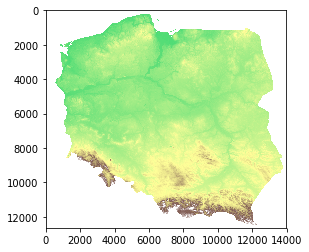

In [3]:
# Show a hysometric tint
plt.imshow(Z,cmap='terrain',vmin=-500,vmax=1000)
plt.show()

In [6]:
# Calculate the geomorphons (a numeric code, 1-10)
cellsize = Zt[0]
lookup_pixels = 30
threshold_angle = 1
def gm_wrap(I):
    this_G = neil.get_geomorphons(I,cellsize,lookup_pixels,threshold_angle)
    return this_G
G = apply_parallel(gm_wrap,Z.copy(),1000,30)

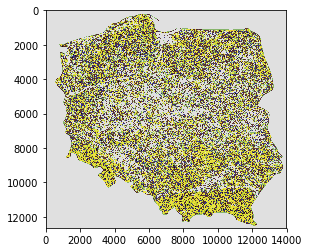

In [8]:
# Apply a "standard" colormap and display the image
im = Image.fromarray(G,mode='L')
im.putpalette(neil.geomorphon_cmap())
plt.imshow(im)
plt.show()
im.save('../neilpy_data/poland_geomorphon.png')

In [12]:
neil.write_worldfile(Zt,'../neilpy_data/poland_geomorphon.pgw')

In [ ]:
# Calculate the geomorphons (a numeric code, 1-10)
cellsize = Zt[0]
lookup_pixels = 30
threshold_angle = 1
def gm_wrap(I):
    this_G = neil.get_geomorphon_fro(I,cellsize,lookup_pixels,threshold_angle)
    return this_G
G = apply_parallel(gm_wrap,Z.copy(),1000,30)